**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [197]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [198]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self._n_neighbors = n_neighbors
        self._algorithm = algorithm

    def fit(self, X, y):
        self.train_X = np.array(X, dtype='float')
        self.train_y = np.array(y, dtype='int')
        self.classes = np.unique(y)
        if self._algorithm == 'kd_tree':
            self.tree = KDTree(np.array(X))

    def _dist(self, X):
        n_dist = np.array((self.train_X ** 2).sum(axis=1))
        n_dist_t = np.array((X ** 2).sum(axis=1).reshape(-1, 1))
        arr_prod = np.dot(X, self.train_X.T)
        return np.sqrt(n_dist - 2 * arr_prod + n_dist_t)

    def _nearest_n(self, X):
        X = np.array(X, dtype='float')
        if self._algorithm == 'brute':
            dist = self._dist(X)
            nearest_n = np.argsort(dist, axis=1)[:, :self._n_neighbors]
        elif self._algorithm == 'kd_tree':
            _, nearest_n = self.tree.query(X, k=self._n_neighbors)
        return self.train_y[nearest_n]

    def predict(self, X):
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(),
                                   1, self._nearest_n(X))

    def predict_proba(self, X):
        x = np.array(X, dtype='float')
        nearest_n = self._nearest_n(X)
        proba = np.zeros((X.shape[0], self.classes.shape[0]), dtype='float')
        for col in nearest_n.T:
            proba[range(X.shape[0]), col] += 1
        return proba / self._n_neighbors

    def score(self, X, y):
        return np.mean(y == self.predict(X))

**IRIS**

In [199]:
iris = datasets.load_iris()

In [200]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [201]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [202]:
%time clf.fit(X_train, y_train)

CPU times: user 986 µs, sys: 1.37 ms, total: 2.36 ms
Wall time: 1.78 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [203]:
%time my_clf.fit(X_train, y_train)

CPU times: user 325 µs, sys: 161 µs, total: 486 µs
Wall time: 396 µs


In [204]:
%time clf.predict(X_test)

CPU times: user 1.64 ms, sys: 2.15 ms, total: 3.8 ms
Wall time: 3.32 ms


array([1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1])

In [205]:
%time my_clf.predict(X_test)

CPU times: user 1.52 ms, sys: 1.79 ms, total: 3.31 ms
Wall time: 2.12 ms


array([1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1])

In [206]:
%time clf.predict_proba(X_test)

CPU times: user 1.38 ms, sys: 844 µs, total: 2.22 ms
Wall time: 1.58 ms


array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [207]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.4 ms, sys: 1.25 ms, total: 2.66 ms
Wall time: 1.92 ms


array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [208]:
clf.score(X_test, y_test)

0.8

In [209]:
my_clf.score(X_test, y_test)

0.8

Задание 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


Best score with 10 neighbors


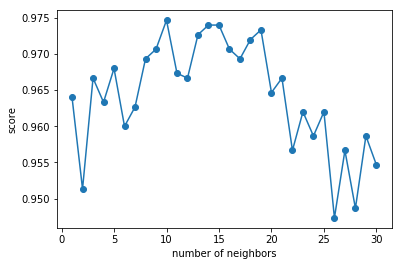

In [210]:
#%%pycodestyle

max_neighbors = 30
count_of_tests = 100
neigh_results = []
for neighbors in range(1, max_neighbors + 1):
    tests_results = []
    for i in range(count_of_tests):
        X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                            iris.target,
                                                            test_size=0.1,
                                                            stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=neighbors)
        my_clf.fit(X_train, y_train)
        tests_results.append(my_clf.score(X_test, y_test))
    neigh_results.append(np.mean(tests_results))

best_neigh_count = np.argmax(neigh_results) + 1

print("Best score with {} neighbors".format(best_neigh_count))
plt.plot(range(1, max_neighbors + 1), neigh_results, 'o-')
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.show()

**MNIST**

In [211]:
mnist = fetch_mldata('MNIST original')

In [212]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [213]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [214]:
%time clf.fit(X_train, y_train)

CPU times: user 24.3 s, sys: 440 ms, total: 24.8 s
Wall time: 25.3 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [215]:
%time my_clf.fit(X_train, y_train)

CPU times: user 125 ms, sys: 141 ms, total: 266 ms
Wall time: 319 ms


In [216]:
%time clf.predict(X_test)

CPU times: user 58.6 s, sys: 465 ms, total: 59.1 s
Wall time: 1min


array([2., 6., 0., 0., 1., 9., 7., 1., 0., 9., 5., 4., 4., 1., 2., 9., 7.,
       3., 9., 1., 0., 4., 5., 0., 1., 7., 2., 3., 3., 0., 3., 1., 6., 9.,
       4., 2., 6., 1., 3., 1., 4., 5., 3., 2., 7., 3., 7., 7., 3., 5., 7.,
       6., 9., 2., 0., 1., 2., 1., 7., 2., 5., 9., 9., 6., 8., 6., 3., 9.,
       1., 4., 6., 8., 1., 6., 4., 1., 0., 1., 0., 7., 3., 8., 8., 5., 6.,
       2., 2., 1., 5., 9., 4., 1., 3., 6., 3., 1., 4., 7., 9., 4., 7., 9.,
       6., 9., 0., 0., 4., 8., 3., 3., 3., 3., 1., 9., 8., 3., 1., 4., 6.,
       5., 5., 4., 4., 0., 8., 6., 1., 1., 6., 2., 8., 6., 5., 9., 1., 5.,
       4., 7., 7., 9., 6., 1., 3., 1., 0., 8., 5., 3., 5., 0., 5., 2., 7.,
       1., 4., 0., 6., 4., 7., 3., 7., 5., 3., 9., 9., 0., 7., 5., 5., 9.,
       2., 3., 7., 2., 3., 3., 8., 3., 2., 3., 9., 5., 0., 4., 8., 4., 2.,
       6., 3., 6., 7., 5., 0., 8., 2., 4., 3., 0., 9., 5., 5., 5., 4., 4.,
       4., 3., 2., 1., 8., 1., 9., 3., 3., 7., 7., 8., 7., 7., 2., 3., 0.,
       5., 4., 7., 7., 4.

In [217]:
%time my_clf.predict(X_test)

CPU times: user 7.28 s, sys: 1.67 s, total: 8.95 s
Wall time: 7.53 s


array([2, 6, 0, 0, 1, 9, 7, 1, 0, 9, 5, 4, 4, 1, 2, 9, 7, 3, 9, 1, 0, 4,
       5, 0, 1, 7, 2, 3, 3, 0, 3, 1, 6, 9, 4, 2, 6, 1, 3, 1, 4, 5, 3, 2,
       7, 3, 7, 7, 3, 5, 7, 6, 9, 2, 0, 1, 2, 1, 7, 2, 5, 9, 9, 6, 8, 6,
       3, 9, 1, 4, 6, 8, 1, 6, 4, 1, 0, 1, 0, 7, 3, 8, 8, 5, 6, 2, 2, 1,
       5, 9, 4, 1, 3, 6, 3, 1, 4, 7, 9, 4, 7, 9, 6, 9, 0, 0, 4, 8, 3, 3,
       3, 3, 1, 9, 8, 3, 1, 4, 6, 5, 5, 4, 4, 0, 8, 6, 1, 1, 6, 2, 8, 6,
       5, 9, 1, 5, 4, 7, 7, 9, 6, 1, 3, 1, 0, 8, 5, 3, 5, 0, 5, 2, 7, 1,
       4, 0, 6, 4, 7, 3, 7, 5, 3, 9, 9, 0, 7, 5, 5, 9, 2, 3, 7, 2, 3, 3,
       8, 3, 2, 3, 9, 5, 0, 4, 8, 4, 2, 6, 3, 6, 7, 5, 0, 8, 2, 4, 3, 0,
       9, 5, 5, 5, 4, 4, 4, 3, 2, 1, 8, 1, 9, 3, 3, 7, 7, 8, 7, 7, 2, 3,
       0, 5, 4, 7, 7, 4, 0, 8, 4, 3, 9, 6, 3, 7, 5, 1, 2, 5, 0, 2, 6, 1,
       1, 8, 6, 0, 3, 1, 4, 4, 6, 8, 4, 3, 1, 0, 5, 0, 3, 6, 7, 4, 4, 7,
       2, 7, 3, 3, 5, 2, 0, 5, 8, 2, 1, 9, 9, 1, 6, 1, 7, 4, 6, 9, 7, 6,
       9, 9, 5, 8, 0, 5, 8, 7, 2, 3, 5, 0, 8, 8, 5,

In [218]:
%time clf.predict_proba(X_test)

CPU times: user 58.7 s, sys: 440 ms, total: 59.2 s
Wall time: 59.9 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [219]:
%time my_clf.predict_proba(X_test)

CPU times: user 6.83 s, sys: 1.46 s, total: 8.29 s
Wall time: 6.83 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [220]:
clf.score(X_test, y_test)

0.9742857142857143

In [221]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 4

In [222]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [223]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [224]:
%time clf.fit(X_train, y_train)

CPU times: user 23.1 s, sys: 289 ms, total: 23.4 s
Wall time: 23.5 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [225]:
%time my_clf.fit(X_train, y_train)

CPU times: user 23.2 s, sys: 417 ms, total: 23.6 s
Wall time: 23.6 s


In [226]:
%time clf.predict(X_test)

CPU times: user 57.7 s, sys: 277 ms, total: 58 s
Wall time: 58.5 s


array([2., 1., 6., 4., 6., 2., 0., 0., 1., 9., 1., 1., 6., 4., 4., 3., 6.,
       9., 6., 0., 2., 3., 6., 0., 0., 4., 1., 0., 9., 2., 3., 0., 0., 7.,
       6., 9., 6., 4., 5., 4., 8., 7., 1., 7., 3., 8., 5., 1., 6., 1., 9.,
       7., 9., 8., 1., 6., 8., 7., 3., 4., 1., 7., 6., 0., 0., 7., 7., 1.,
       1., 6., 6., 1., 2., 9., 6., 9., 4., 4., 2., 0., 9., 3., 4., 2., 4.,
       4., 2., 0., 7., 0., 0., 7., 6., 7., 9., 8., 3., 3., 6., 1., 7., 4.,
       7., 2., 4., 4., 0., 6., 1., 5., 4., 9., 2., 5., 2., 5., 1., 2., 6.,
       0., 4., 1., 1., 5., 3., 5., 3., 1., 1., 3., 9., 1., 4., 0., 9., 2.,
       9., 8., 1., 2., 7., 1., 5., 9., 0., 4., 8., 6., 8., 1., 5., 9., 4.,
       7., 4., 8., 7., 9., 5., 3., 5., 3., 2., 8., 0., 5., 9., 6., 3., 9.,
       1., 0., 1., 2., 5., 5., 3., 4., 5., 2., 7., 5., 2., 9., 7., 1., 4.,
       5., 9., 4., 2., 9., 7., 0., 6., 4., 4., 0., 6., 4., 1., 9., 4., 0.,
       4., 9., 1., 8., 0., 4., 2., 0., 2., 3., 6., 1., 1., 8., 3., 4., 7.,
       2., 3., 7., 8., 1.

In [227]:
%time my_clf.predict(X_test)

CPU times: user 50.5 s, sys: 245 ms, total: 50.8 s
Wall time: 51.1 s


array([2, 1, 6, 4, 6, 2, 0, 0, 1, 9, 1, 1, 6, 4, 4, 3, 6, 9, 6, 0, 2, 3,
       6, 0, 0, 4, 1, 0, 9, 2, 3, 0, 0, 7, 6, 9, 6, 4, 5, 4, 8, 7, 1, 7,
       3, 8, 5, 1, 6, 1, 9, 7, 9, 8, 1, 6, 8, 7, 3, 4, 1, 7, 6, 0, 0, 7,
       7, 1, 1, 6, 6, 1, 2, 9, 6, 9, 4, 4, 2, 0, 9, 3, 4, 2, 4, 4, 2, 0,
       7, 0, 0, 7, 6, 7, 9, 8, 3, 3, 6, 1, 7, 4, 7, 2, 4, 4, 0, 6, 1, 5,
       4, 9, 2, 5, 2, 5, 1, 2, 6, 0, 4, 1, 1, 5, 3, 5, 3, 1, 1, 3, 9, 1,
       4, 0, 9, 2, 9, 8, 1, 2, 7, 1, 5, 9, 0, 4, 8, 6, 8, 1, 5, 9, 4, 7,
       4, 8, 7, 9, 5, 3, 5, 3, 2, 8, 0, 5, 9, 6, 3, 9, 1, 0, 1, 2, 5, 5,
       3, 4, 5, 2, 7, 5, 2, 9, 7, 1, 4, 5, 9, 4, 2, 9, 7, 0, 6, 4, 4, 0,
       6, 4, 1, 9, 4, 0, 4, 9, 1, 8, 0, 4, 2, 0, 2, 3, 6, 1, 1, 8, 3, 4,
       7, 2, 3, 7, 8, 1, 6, 2, 2, 9, 1, 9, 8, 3, 8, 9, 7, 7, 7, 2, 1, 6,
       9, 0, 6, 1, 7, 3, 2, 4, 7, 0, 8, 1, 8, 5, 3, 2, 0, 7, 0, 6, 9, 7,
       2, 6, 2, 8, 7, 7, 0, 6, 3, 5, 1, 4, 8, 3, 8, 7, 2, 5, 0, 5, 3, 6,
       9, 0, 6, 3, 9, 6, 3, 1, 3, 4, 9, 5, 6, 1, 3,

In [228]:
%time clf.predict_proba(X_test)

CPU times: user 57.7 s, sys: 285 ms, total: 58 s
Wall time: 58.5 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [229]:
%time my_clf.predict_proba(X_test)

CPU times: user 51.8 s, sys: 348 ms, total: 52.1 s
Wall time: 52.8 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [230]:
clf.score(X_test, y_test)

0.9671428571428572

In [231]:
my_clf.score(X_test, y_test)

0.9671428571428572

Задание 5

In [ ]:
# seaborn - Библиотека для визуализации данных, основанная на matplotlib
# matplotlib - Библиотека для построения графиков
# train_test_split - Функция библиотеки sklearn, разбивающая выборку на две случайные: тренировочную и тестирующую. 
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - Функция для последовательного преобразования данных (конвеер)
# StandardScaler (from sklearn.preprocessing import StandardScaler) - Класс для стандартизации данных (мат. ожидание - 0, дисперсия - 1)
# ClassifierMixin - Базовый класс для всех классификаторов в библиоткек sklearn
# NeighborsBase - Базовый класс для классификатора KNN из sklearn
# KNeighborsMixin - Базовый класс для классификатора KNN, содержащий методы поиска
# SupervisedIntegerMixin - Класс, содержащий метод обучения для целых целевых меток fit